# Visualizing Fandango Scores

To investigate the potential bias that movie reviews site have, [FiveThirtyEight](https://fivethirtyeight.com/) compiled data for `147` films from 2015 that have substantive reviews from both critics and consumers. Every time Hollywood releases a movie, critics from [Metacritic](https://www.metacritic.com/), [Fandango](https://www.fandango.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), and [IMDB](https://www.imdb.com/) review and rate the film. They also ask the users in their respective communities to review and rate the film. Then, they calculate the average rating from both critics and users and display them on their site. Here are screenshots from each site:

![](https://s3.amazonaws.com/dq-content/review_sites_screenshots.png)

FiveThirtyEight compiled this dataset to investigate if there was any bias to Fandango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings. After discovering that a few films that weren't good were still rated highly on Fandango, the team investigated and published [an article about bias in movie ratings.](http://fivethirtyeight.com/features/fandango-movies-ratings/)

## Introduction to the Dataset

[`fandango_scores.csv`](../data/fandango_scores.csv) is the dataset that is used here. 

### Column Descriptions

The descriptions of the column can be found here:

* `FILM` - film name
* `RT_user_norm` - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
* `Metacritic_user_nom` - average user rating from Metacritic, normalized to a 1 to 5 point scale
* `IMDB_norm` - average user rating from IMDB, normalized to a 1 to 5 point scale
* `Fandango_Ratingvalue` - average user rating from Fandango, normalized to a 1 to 5 point scale
* `Fandango_Stars` - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

> Instead of displaying the raw rating, it has been discovered that Fandango usually rounded the average rating to the next highest half star (next highest 0.5 value). The `Fandango_Ratingvalue` column reflects the true average rating while the `Fandango_Stars` column reflects the displayed, rounded rating.


# Reading the Data set

Reading to compare how a movie fared across all 4 review sites.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
reviews = pd.read_csv('../data/fandango_scores.csv')
reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
norm_reviews = reviews[['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']]
norm_reviews.head(10)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.30,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.00,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.50,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.20,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.40,1.70,2.55,3.0,3.5
5,The Water Diviner (2015),3.10,3.40,3.60,4.0,4.5
6,Irrational Man (2015),2.65,3.80,3.45,3.5,4.0
7,Top Five (2014),3.20,3.40,3.25,3.5,4.0
8,Shaun the Sheep Movie (2015),4.10,4.40,3.70,4.0,4.5
9,Love & Mercy (2015),4.35,4.25,3.90,4.0,4.5


These sites use different scales for ratings. Some use a `5` star scale while others use a `100` point scale. In addition, *Metacritic* and *Rotten Tomatoes* aggregate scores from both users and film critics, while *IMDB* and *Fandango* aggregate only from their users. Focus will be on the  average scores from users, because not all of the sites have scores from critics.

The `RT_user_norm`, `Metacritic_user_nom`, `IMDB_norm`, and `Fandango_Ratingvalue` columns contain the average user rating for each movie, normalized to a `0` to `5` point scale. This allows to compare how the users on each site rated a movie. While using averages isn't perfect because films with a few reviews can skew the average rating, FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included.

Looking at the first row, which lists the average user ratings for `Avengers: Age of Ultron (2015)`, it is noticed that the Fandango ratings, both the actual and the displayed rating, are higher than those from the other sites for a given movie. 

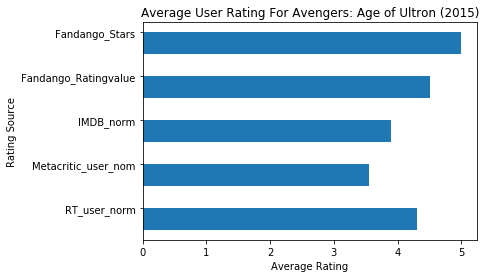

In [8]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = np.arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_xlabel('Average Rating')
ax.set_ylabel('Rating Source')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

From the plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites.

## visualizing the relationship between the Fandango_Ratingvalue and RT_user_norm columns. 

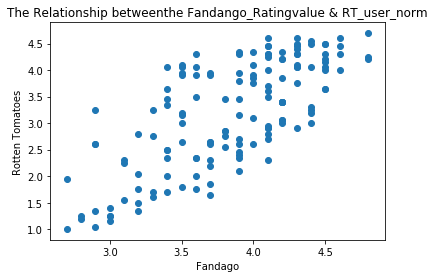

In [10]:
plt.scatter(norm_reviews.Fandango_Ratingvalue, norm_reviews.RT_user_norm)
plt.title('The Relationship betweenthe Fandango_Ratingvalue & RT_user_norm')
plt.xlabel('Fandago')
plt.ylabel('Rotten Tomatoes')
plt.show()

> The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.


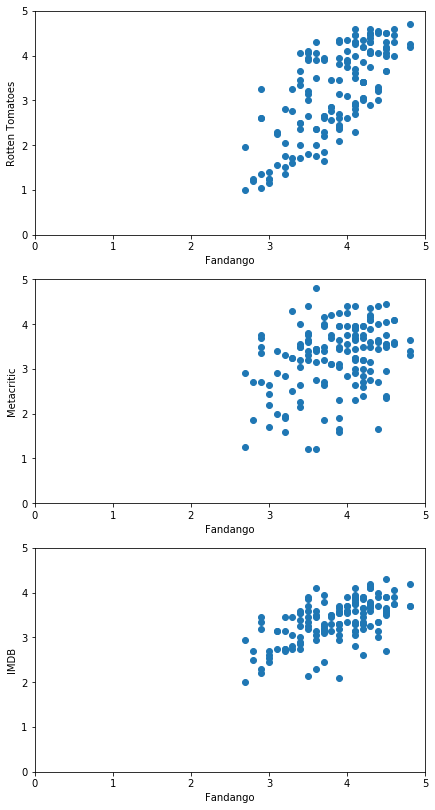

In [12]:
fig = plt.figure(figsize=(7,14))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews.Fandango_Ratingvalue, norm_reviews.RT_user_norm)
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews.Fandango_Ratingvalue, norm_reviews.Metacritic_user_nom)
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews.Fandango_Ratingvalue, norm_reviews.IMDB_norm)
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)

plt.show()

From the scatter plots, we can conclude that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.